In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
bookings = pd.read_excel('Retailo-Analytics Assignment (RAA).xlsx', sheet_name='Bookings')
bookings.head()

,Level 1 (Company),Level 2 (Area),Opportunity Owner,Opportunity Number,Production License Delivered,Stage,Type,Billing Type,Financial Services Vertical,Forbes Global 2000,Account ID,Activity,Bookings,Fiscal Period Booked,Fiscal Year Booked,Created Date,First Signed Opportunity Date,Close Date,Invoice Date
0,Targaryen Trading Company,Winterfell,Jon Umber,1707.114481,NaN,Committed Renewal,Renewal/Support,Subscription,0,0,57. bad,Active,172724.515000,Q4-2015,2015,2016-01-29 00:00:00,2016-01-29 00:00:00,2016-01-29 00:00:00,2018-01-29 00:00:00
1,Targaryen Trading Company,Dorne,Mace Tyrell,2383.734399,NaN,Committed Renewal,Renewal/Support,Subscription,0,0,159. pastoral,Active,125847.912169,Q2-2015,2015,42172,41808,42167,42903
2,Targaryen Trading Company,Winterfell,Daenerys Targaryen,4399.798219,NaN,Committed Renewal,Renewal/Support,Subscription,0,0,13. wail,Active,345837.362426,Q4-2015,2015,2015-12-28 00:00:00,2015-12-28 00:00:00,2015-12-28 00:00:00,2017-12-28 00:00:00
3,Targaryen Trading Company,Winterfell,Ser Jaime Lannister,5239.201999,41859,Signed & Paid,Add-on,Subscription,0,0,103. bear,Active,9838.743461,Q3-2014,2014,2014-08-08 00:00:00,2013-05-28 00:00:00,2014-08-08 00:00:00,2014-08-08 00:00:00
4,Targaryen Trading Company,Winterfell,Tommen Baratheon,6681.927392,NaN,Signed & Paid,Renewal/Support,Perpetual,0,1,44. grateful,Active,800746.168422,Q1-2014,2014,2014-04-01 00:00:00,2014-04-08 00:00:00,2014-04-08 00:00:00,2015-04-27 00:00:00


In [ ]:
bookings.dtypes

Level 1 (Company)                 object
Level 2 (Area)                    object
Opportunity Owner                 object
Opportunity Number               float64
Production License Delivered      object
Stage                             object
Type                              object
Billing Type                      object
Financial Services Vertical        int64
Forbes Global 2000                 int64
Account ID                        object
Activity                          object
Bookings                         float64
Fiscal Period Booked              object
Fiscal Year Booked                 int64
Created Date                      object
First Signed Opportunity Date     object
Close Date                        object
Invoice Date                      object
dtype: object

##### 1.Using SQL, create a table which shows FY14 and FY15 Totals of Bookings by Level 2  (Area). With the data you pull, create a visualization of growth year over year.
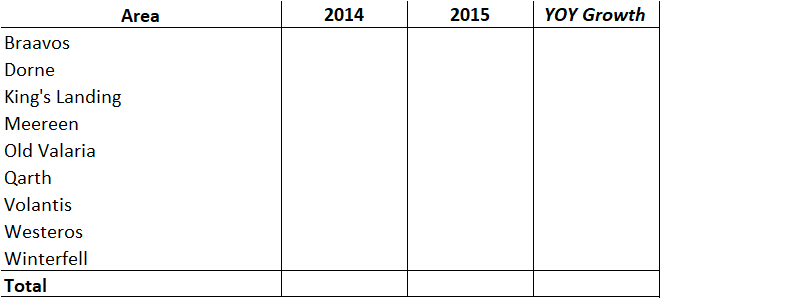

In [ ]:
# FY14 and FY15 Totals of Bookings by Level 2 (Area)
year_14 = bookings[bookings['Fiscal Year Booked'] == 2014]
year_15 = bookings[bookings['Fiscal Year Booked'] == 2015]
year_14.rename(columns={'Bookings': '2014 Bookings'}, inplace=True)
year_15.rename(columns={'Bookings': '2015 Bookings'}, inplace=True)
year_booking_level_14 = year_14.groupby(['Level 2 (Area)'])['2014 Bookings'].sum()
year_booking_level_15 = year_15.groupby(['Level 2 (Area)'])['2015 Bookings'].sum()

In [ ]:
# growth year over year
concat_booking = pd.concat([year_booking_level_14,year_booking_level_15],axis=1, join='inner')
concat_booking['yoy'] = ((concat_booking['2015 Bookings'] - concat_booking['2014 Bookings']) / concat_booking['2014 Bookings'])*100
concat_booking

,2014 Bookings,2015 Bookings,yoy
Level 2 (Area),,,
Braavos,1.022284e+08,9.678397e+07,-5.325704
Dorne,4.342335e+07,2.783469e+08,541.007308
King's Landing,4.545357e+07,1.637962e+08,260.359270
Volantis,1.224905e+07,1.123138e+08,816.918259
Winterfell,7.723419e+07,1.906364e+08,146.828973


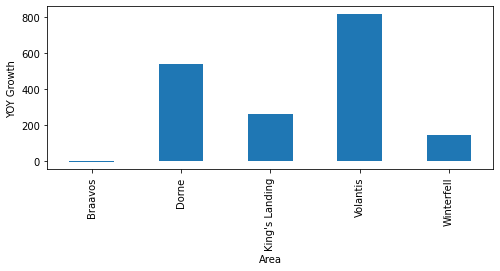

In [ ]:
concat_booking['yoy'].plot(kind='bar', figsize=(8, 3))
plt.xlabel('Area')
plt.ylabel('YOY Growth')
plt.show()

### 2. Add a column to the data set mapping 'Opportunity Owner' to Level 3 (House) using the data in the 'lookups' tab. Afterwards, paste your results into a new tab called "House Bookings". On the new 'House Bookings' tab show Bookings by House by Opportunity Owner, aggregating House totals.

In [ ]:
lookups = pd.read_excel('Retailo-Analytics Assignment (RAA).xlsx', sheet_name='lookups')
lookups.head()

,Opportunity Owner,Level 3 (House)
0,Aegon Targaryen,House Targaryen
1,Aemon Targaryen,House Targaryen
2,Allister Thorn,Other
3,Arya Stark,House Stark
4,Asha Greyjoy,House Greyjoy


In [ ]:
# Add a column to the data set mapping 'Opportunity Owner' to Level 3 (House) using the data in the 'lookups' tab
house_bookings = pd.merge(bookings, lookups, on='Opportunity Owner', how="inner")

In [ ]:
# show Bookings by House by Opportunity Owner, aggregating House totals.
house_bookings.groupby(['Level 3 (House)','Opportunity Owner']).agg({'Bookings':'sum', 'Level 3 (House)':'count'})

Bookings  Level 3 (House)
Level 3 (House) Opportunity Owner                                              
House Arryn     Jon Arryn                         1.502897e+08              112
                Lysa Arryn                        9.287054e+07               17
                Robert Arryn                      9.046040e+07               11
House Baratheon Cersei Baratheon (née Lannister)  7.618198e+07               16
                Joffrey Baratheon                 7.927308e+07                4
...                                                        ...              ...
Other           Septa Mordane                     1.729431e+06                6
                Ser Barristan Selmy               3.308421e+06                5
                Ser Ilyn Payne                    4.481298e+05                1
                Ser Jorah Mormont                 3.069397e+06                4
                Varys                             1.985267e+06               51

[79 rows x 2 columns]

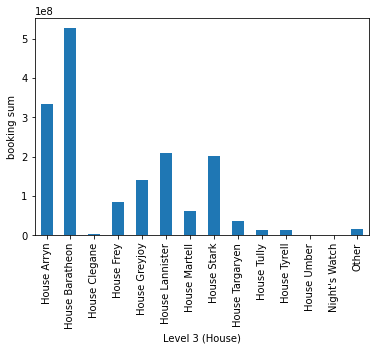

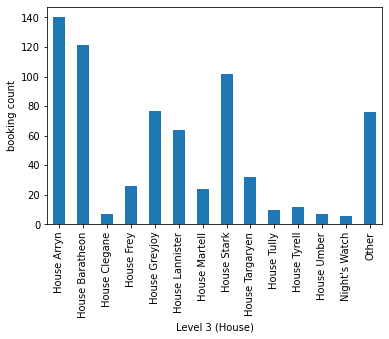

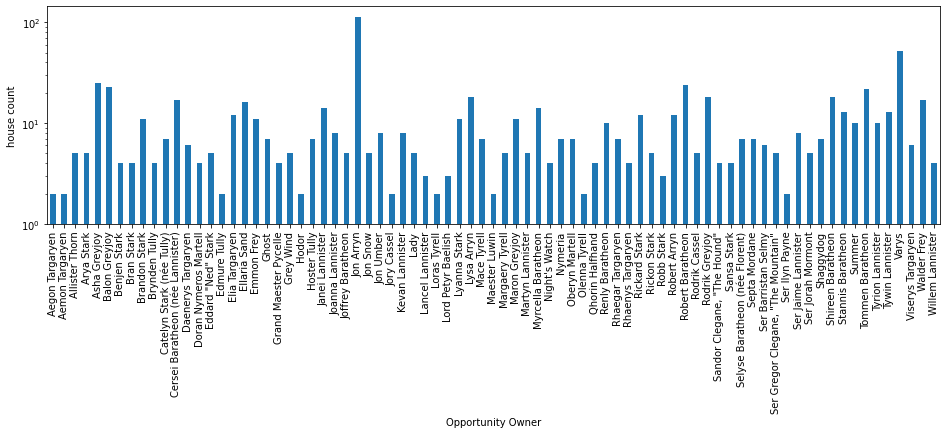

In [ ]:
house_bookings.groupby('Level 3 (House)')['Bookings'].sum().plot(kind='bar', figsize=(6, 4))
plt.ylabel("booking sum")
plt.show()

house_bookings.groupby('Level 3 (House)')['Bookings'].count().plot(kind='bar',figsize=(6, 4))
plt.ylabel("booking count")
plt.show()

house_bookings.groupby('Opportunity Owner')['Level 3 (House)'].count().plot(kind='bar', figsize=(16, 4),log=True)
plt.ylabel("house count")
plt.show()

### 3. From the data in the Bookings tab, write a query to get the following layout. From there, use 6 quarters of actuals to forecast the final two quarters of 2016

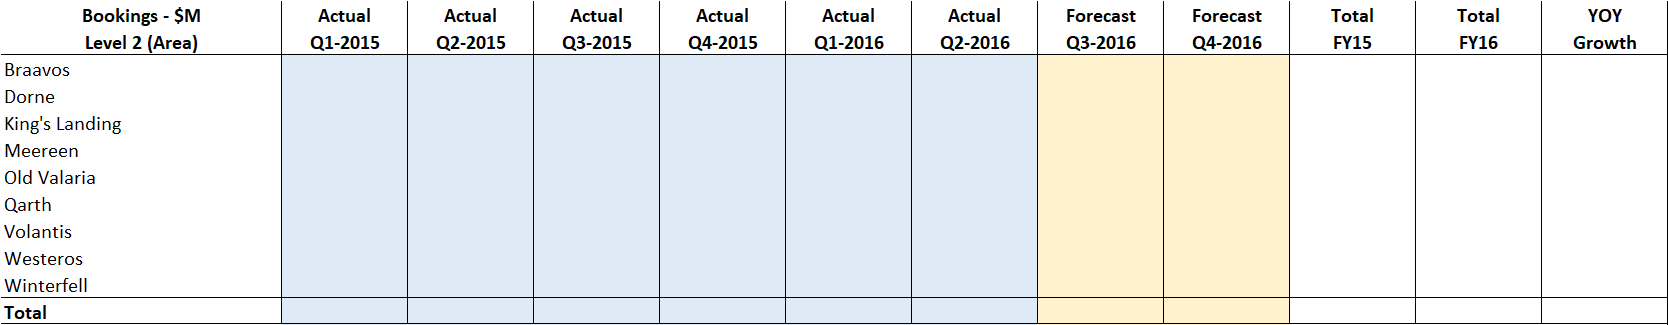

In [ ]:
bookings_15_16 = bookings[(bookings['Fiscal Year Booked'] == 2015) |(bookings['Fiscal Year Booked'] == 2016)]
quarter_level_booking = pd.pivot_table(data=bookings_15_16,index=['Level 2 (Area)'],values=['Bookings'],columns=['Fiscal Period Booked'],aggfunc=np.sum, fill_value=0)
quarter_level_booking['total 2015'] = quarter_level_booking['Bookings','Q1-2015'] + quarter_level_booking['Bookings','Q2-2015'] + quarter_level_booking['Bookings','Q3-2015'] + quarter_level_booking['Bookings','Q4-2015']
quarter_level_booking

Bookings                ...                  total 2015
Fiscal Period Booked       Q1-2015       Q1-2016  ...       Q4-2015              
Level 2 (Area)                                    ...                            
Braavos               8.967586e+05  0.000000e+00  ...  5.063909e+07  9.678397e+07
Dorne                 2.940397e+07  3.289716e+07  ...  9.204846e+07  2.783469e+08
King's Landing        8.864301e+06  1.560914e+06  ...  3.920800e+07  1.637962e+08
Meereen               1.748214e+05  4.996813e+05  ...  3.200390e+05  1.366991e+06
Old Valaria           0.000000e+00  9.561708e+06  ...  2.444056e+07  2.863164e+07
Qarth                 0.000000e+00  0.000000e+00  ...  0.000000e+00  0.000000e+00
Volantis              0.000000e+00  2.477227e+06  ...  1.067875e+08  1.123138e+08
Winterfell            4.599697e+07  6.043593e+07  ...  7.867491e+07  1.906364e+08

[8 rows x 8 columns]

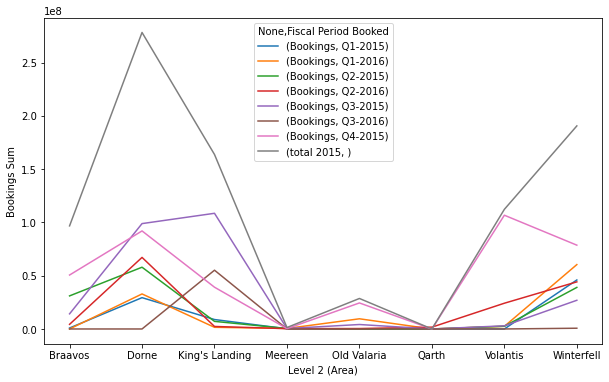

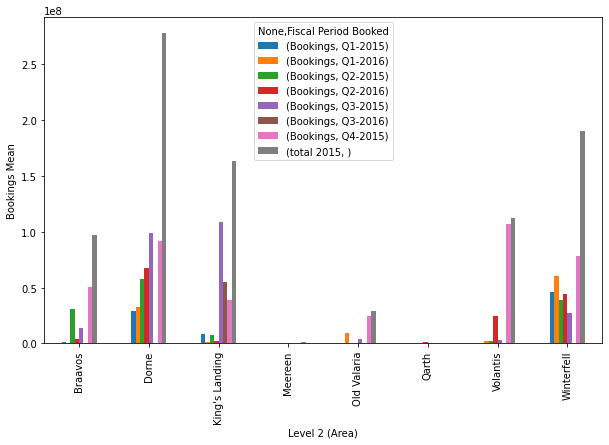

In [ ]:
quarter_level_booking.plot(subplots=False, use_index=True, figsize=(10, 6))
plt.ylabel("Bookings Sum")
plt.show()

quarter_level_booking.plot(subplots=False, use_index=True, figsize=(10, 6), kind="bar")
plt.ylabel("Bookings Mean")
plt.show()

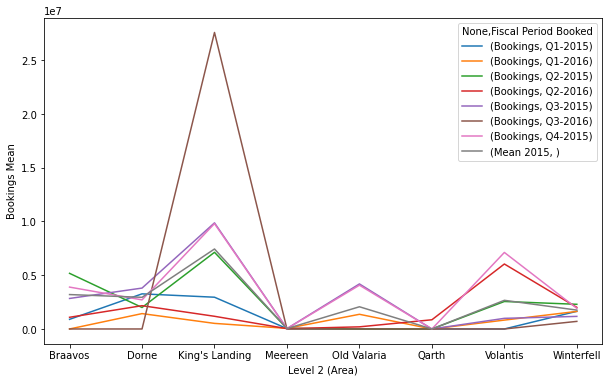

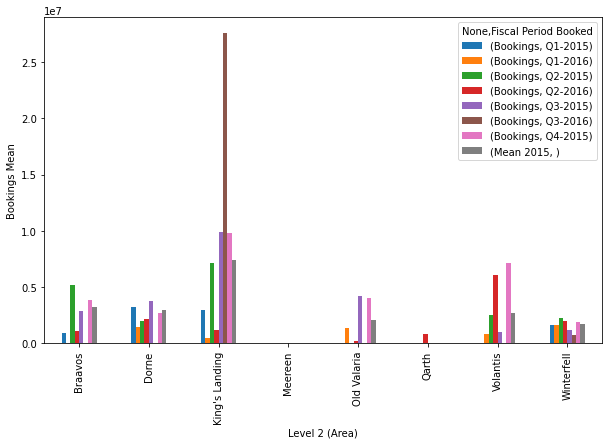

In [ ]:
quarter_level_booking_mean = pd.pivot_table(data=bookings_15_16,index=['Level 2 (Area)'],values=['Bookings'],columns=['Fiscal Period Booked'],aggfunc=np.mean, fill_value=0)
quarter_level_booking_mean['Mean 2015'] = (quarter_level_booking_mean['Bookings','Q1-2015'] + quarter_level_booking_mean['Bookings','Q2-2015'] + quarter_level_booking_mean['Bookings','Q3-2015'] + quarter_level_booking_mean['Bookings','Q4-2015'])/4

quarter_level_booking_mean.plot(subplots=False, use_index=True, figsize=(10, 6))
plt.ylabel("Bookings Mean")
plt.show()

quarter_level_booking_mean.plot(subplots=False, use_index=True, figsize=(10, 6), kind="bar")
plt.ylabel("Bookings Mean")
plt.show()

In [ ]:
# quarter_level_booking['Bookings']
# from sklearn.linear_model import LinearRegression
# x = quarter_level_booking.loc[:, (['Bookings'], ['Q1-2015', 'Q2-2015', 'Q3-2015', 'Q4-2015'])]
# y = quarter_level_booking.loc[:, (['Bookings'], ['Q1-2016'])]

# linear_regressor = LinearRegression()  # create object for the class
# linear_regressor.fit(x, y)  # perform linear regression
# Y_pred = linear_regressor.predict(x)  # make predictions

### 4. Next, write a query to calculate the metrics below for each Opportunity Number 

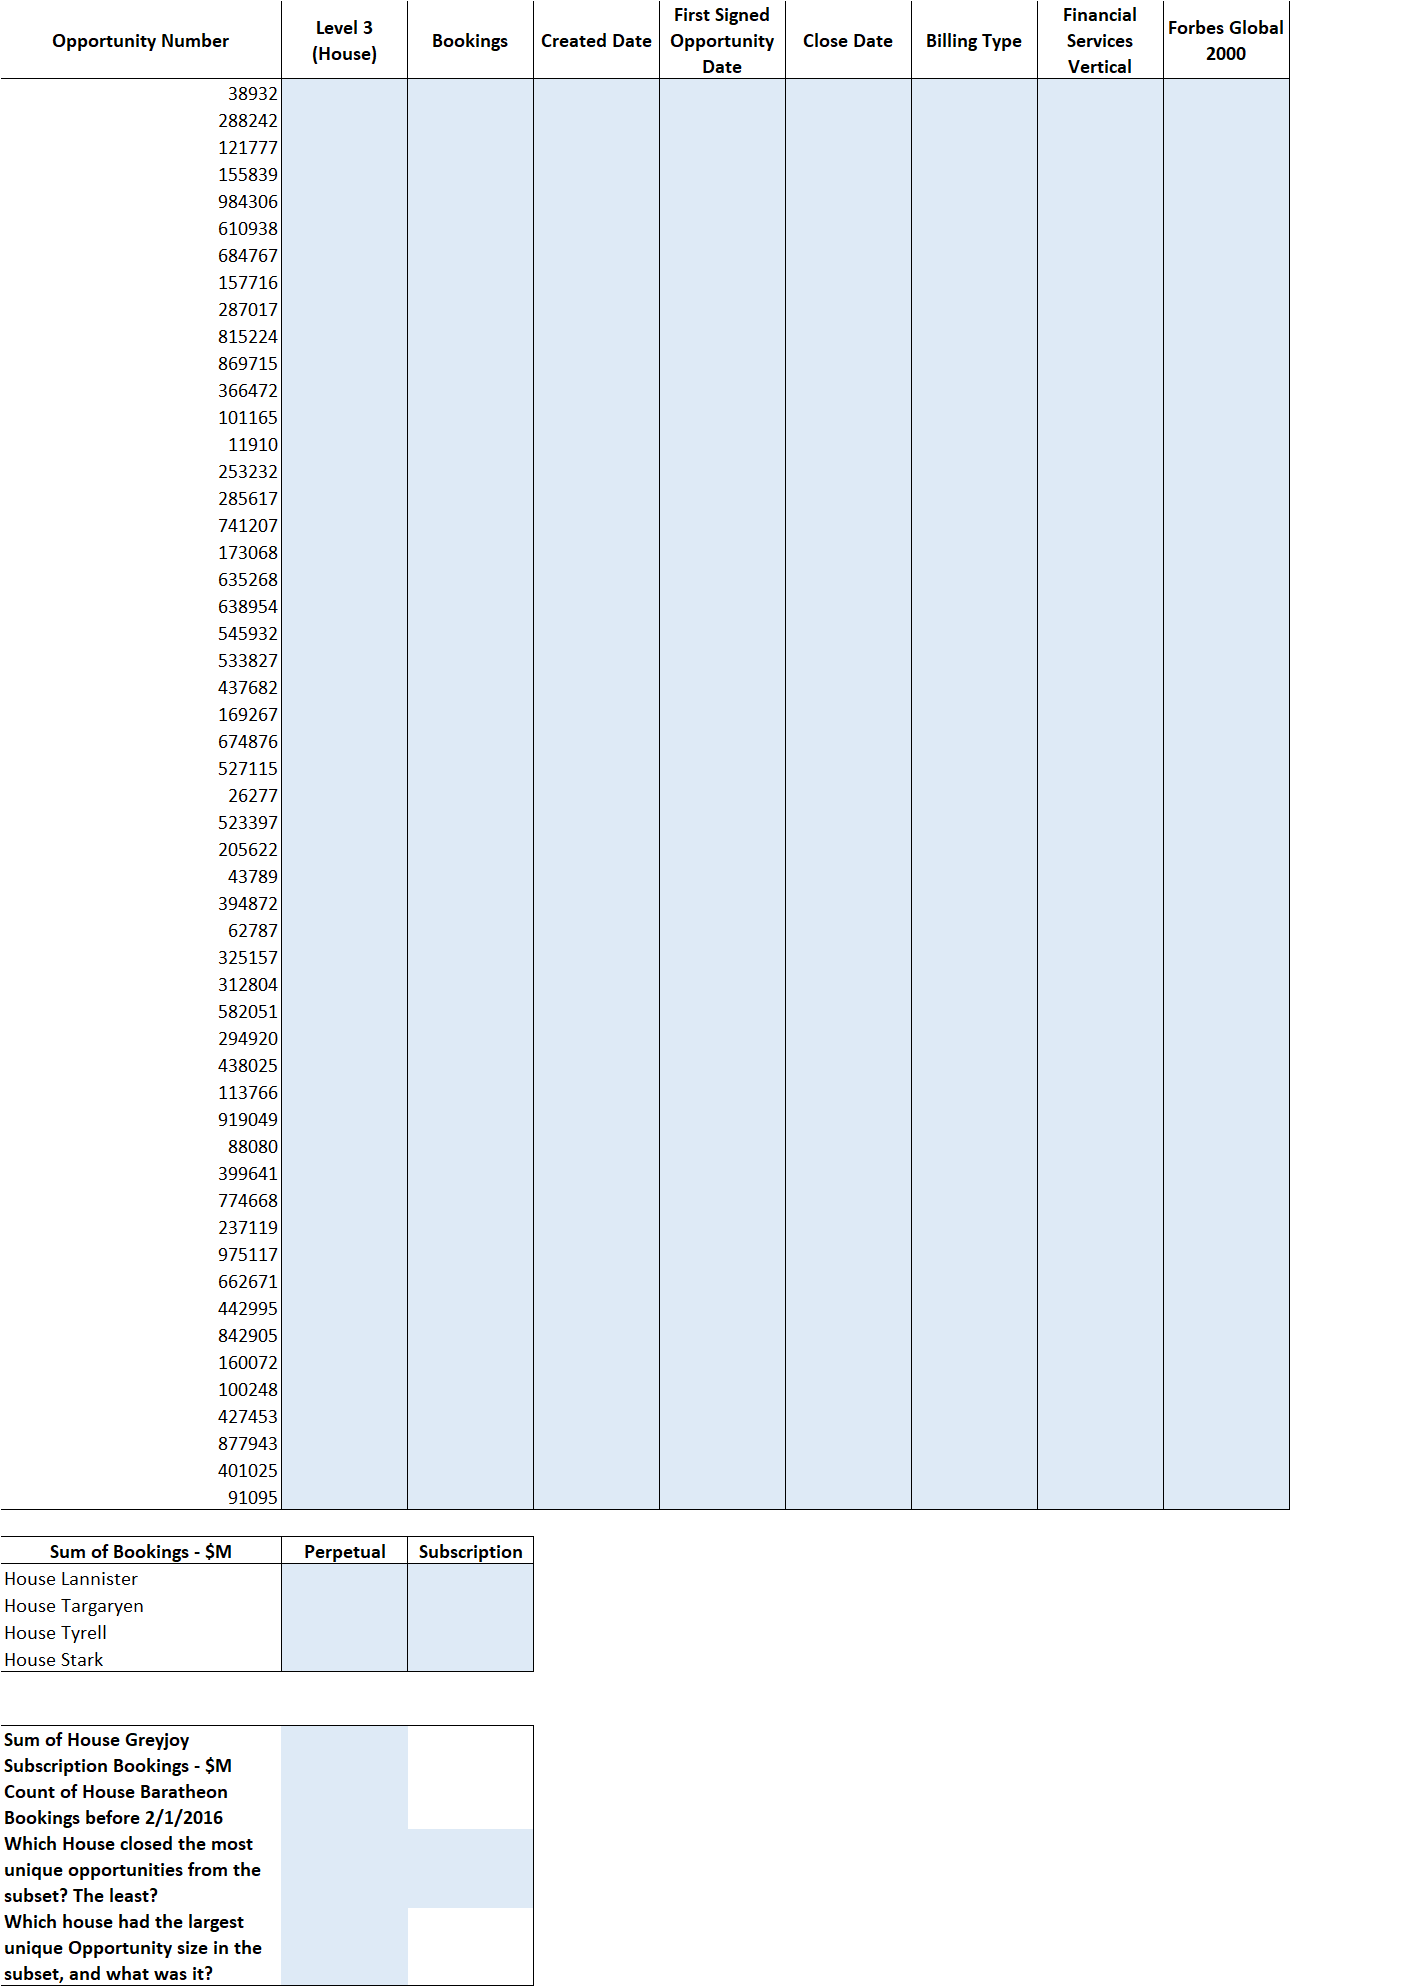

In [ ]:
# calculate the metrics below for each Opportunity Number
opportunity_number_metrics = house_bookings[["Opportunity Number","Level 3 (House)","Bookings","Created Date", "First Signed Opportunity Date","Close Date", "Billing Type","Financial Services Vertical", "Forbes Global 2000"]]
opportunity_number_metrics.head()

,Opportunity Number,Level 3 (House),Bookings,Created Date,First Signed Opportunity Date,Close Date,Billing Type,Financial Services Vertical,Forbes Global 2000
0,1707.114481,House Umber,172724.515000,2016-01-29 00:00:00,2016-01-29 00:00:00,2016-01-29 00:00:00,Subscription,0,0
1,111861.681736,House Umber,366338.650243,2016-01-29 00:00:00,2016-01-29 00:00:00,2016-01-29 00:00:00,Subscription,0,0
2,113766.260865,House Umber,87353.820972,2015-05-01 00:00:00,2016-04-29 00:00:00,2016-04-29 00:00:00,Subscription,0,0
3,437082.541260,House Umber,41055.149231,2014-08-08 00:00:00,2013-05-28 00:00:00,2015-09-16 00:00:00,Subscription,0,0
4,512604.548413,House Umber,1478.139391,2016-03-22 00:00:00,2013-05-28 00:00:00,2016-06-09 00:00:00,Subscription,0,0


In [ ]:
house_billing_booking = pd.pivot_table(data=opportunity_number_metrics,index=['Level 3 (House)'],values=['Bookings'],columns=['Billing Type'],aggfunc=np.sum, fill_value=0)
house_billing_booking

Bookings                            
Billing Type           Hybrid     Perpetual  Subscription
Level 3 (House)                                          
House Arryn      0.000000e+00  2.178629e+08  1.157578e+08
House Baratheon  1.373669e+07  2.169547e+08  2.957011e+08
House Clegane    0.000000e+00  0.000000e+00  2.649162e+06
House Frey       0.000000e+00  2.049703e+07  6.320567e+07
House Greyjoy    0.000000e+00  4.977464e+07  9.180745e+07
House Lannister  0.000000e+00  9.362050e+07  1.155452e+08
House Martell    0.000000e+00  4.457206e+07  1.631804e+07
House Stark      1.475216e+07  6.639342e+07  1.198977e+08
House Targaryen  0.000000e+00  7.703572e+06  2.919398e+07
House Tully      5.934167e+06  2.748289e+06  4.529400e+06
House Tyrell     0.000000e+00  2.080799e+06  1.154448e+07
House Umber      0.000000e+00  0.000000e+00  1.561371e+06
Night's Watch    0.000000e+00  0.000000e+00  9.323525e+05
Other            1.081555e+04  2.317053e+06  1.364342e+07

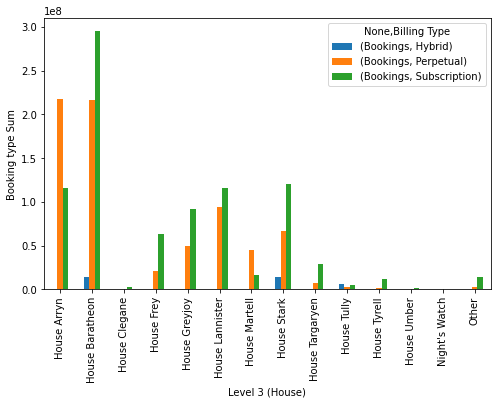

In [ ]:
house_billing_booking.plot(subplots=False, use_index=True, figsize=(8, 5), kind="bar")
plt.ylabel("Booking type Sum")
plt.show()

In [ ]:
# Sum of House Greyjoy Subscription Bookings - $M
opportunity_number_metrics.where(opportunity_number_metrics['Level 3 (House)'] == 'House Greyjoy').groupby('Billing Type')['Bookings'].sum()

Billing Type
Perpetual       4.977464e+07
Subscription    9.180745e+07
Name: Bookings, dtype: float64

In [ ]:
opportunity_number_metrics.loc[((opportunity_number_metrics['Billing Type'] == 'Subscription') & (opportunity_number_metrics['Level 3 (House)'] == 'House Greyjoy'))]['Bookings'].sum()

91807446.48822531

In [ ]:
from datetime import datetime
compare_date = datetime.strptime('2016-02-01 00:00:00', '%Y-%m-%d %H:%M:%S')

In [ ]:
# Count of House Baratheon Bookings before 2/1/2016
filter_house = opportunity_number_metrics['Level 3 (House)'] == 'House Baratheon'
created_date_date = pd.to_datetime(opportunity_number_metrics['Created Date'], errors='coerce')
filter_date = created_date_date < compare_date 
opportunity_number_metrics.where(filter_house & filter_date)['Level 3 (House)'].value_counts()

House Baratheon    99
Name: Level 3 (House), dtype: int64

In [ ]:
# Which House closed the least unique opportunities from the subset?
house_opportunity_number = opportunity_number_metrics.groupby('Level 3 (House)')['Opportunity Number'].count()
house_opportunity_number.idxmax()

'House Arryn'

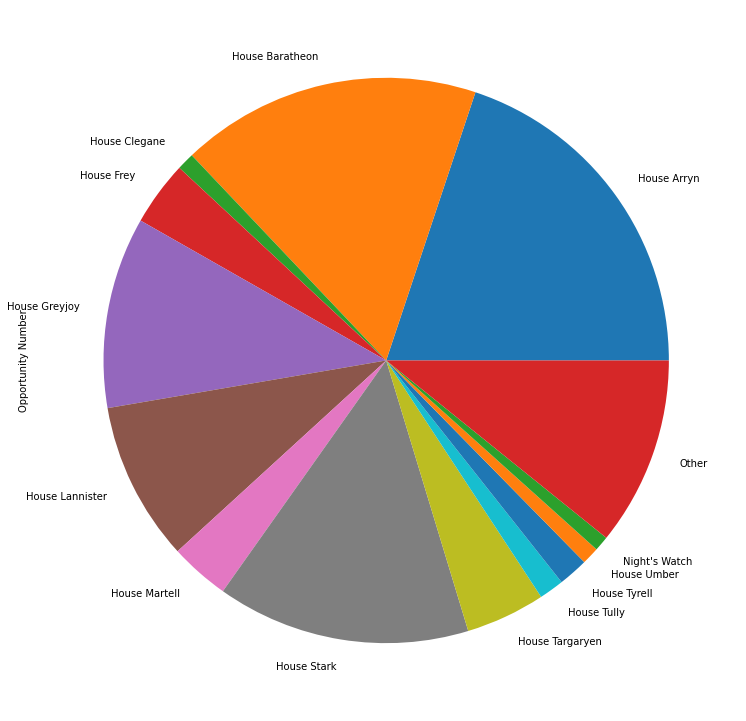

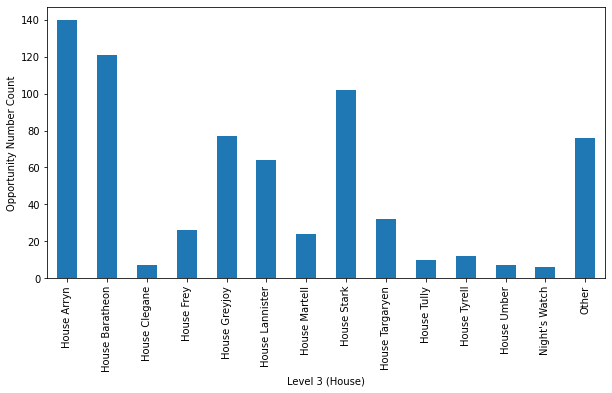

In [ ]:
house_opportunity_number.plot.pie(figsize=(13, 13))
plt.show()

house_opportunity_number.plot(figsize=(10, 5),kind='bar')
plt.ylabel("Opportunity Number Count")
plt.show()

In [ ]:
# Which House closed the most unique opportunities from the subset? 
house_opportunity_number.idxmin()

"Night's Watch"

In [ ]:
# Which house had the largest unique Opportunity size in the subset, and what was it?
house_opportunity_number_sum = opportunity_number_metrics.groupby('Level 3 (House)')['Opportunity Number'].sum()
house_opportunity_number_sum.idxmax()

'House Arryn'

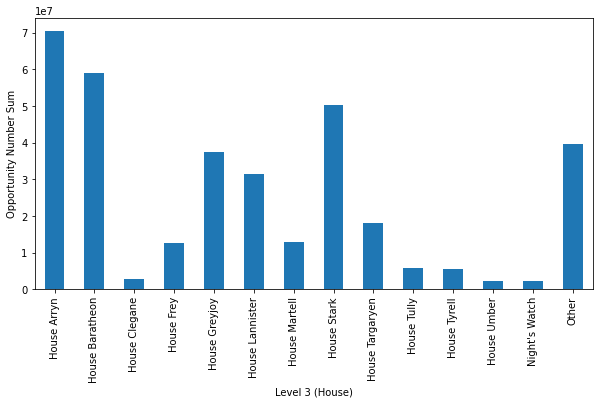

In [ ]:
house_opportunity_number_sum.plot(figsize=(10, 5),kind='bar')
plt.ylabel("Opportunity Number Sum")
plt.show()

### 5.  Write a query to answer the following: From the Bookings tab, which House had the highest Bookings in H1'16? If every sales employee in the organization is included somewhere on the bookings tab, and headcount has remained constant, which house has been the most efficient in terms of Bookings?

In [ ]:
# which House had the highest Bookings in H1'16 (assuming H1'16 is first quarter of 2016)
house_booking_q1_16_sum = house_bookings.where(house_bookings['Fiscal Period Booked'] == 'Q1-2016').groupby('Level 3 (House)')['Bookings'].sum()
house_booking_q1_16_sum.idxmax()

'House Stark'

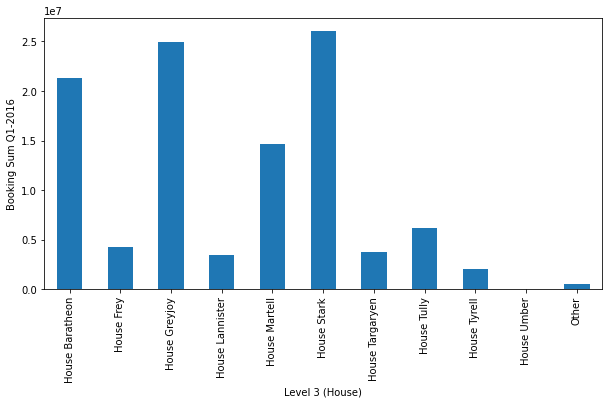

In [ ]:
house_booking_q1_16_sum.plot(figsize=(10, 5),kind='bar')
plt.ylabel("Booking Sum Q1-2016")
plt.show()

In [ ]:
# which house has been the most efficient in terms of Bookings
house_booking_count  = opportunity_number_metrics.groupby(['Level 3 (House)'])['Bookings'].count()
house_booking_count.idxmax()

'House Arryn'

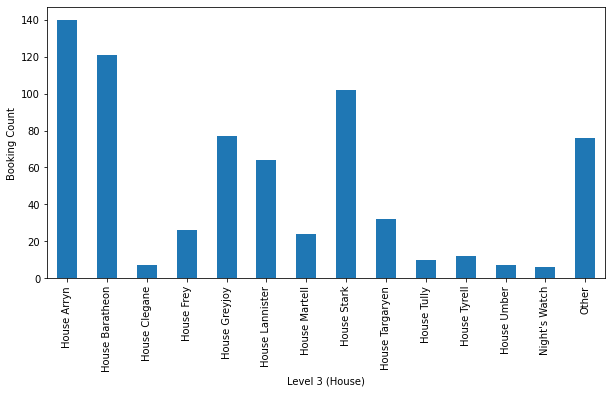

In [ ]:
house_booking_count.plot(figsize=(10, 5),kind='bar')
plt.ylabel("Booking Count")
plt.show()